<h1>Modelling</h1>
<hr/>
<em>Predicting Propensity to Purchase a Vehicle | Motus Hackathon Competition 2025</em>
<author>Sifiso Rimana<author> <br/> 
Student Number: 222138688 <br/>
Email: 222138688@student.uj.ac.za / rimanasifiso@gmail.com <br/>


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split    
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, average_precision_score

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
train_df = pd.read_csv('../data/clean_train.csv')
test_df = pd.read_csv('../data/clean_test.csv')
train_df.head()

,customerid,leadid,leadtype,seek,vehiclesold,is_email_provided,is_valid_email,is_personal_email,is_personal_cell,is_valid_cell,...,model_description_length,dealer_city,dealer_group,is_motus_group,name_length,is_valid_name,is_full_name,is_weekend_lead,lead_response_time,customer_leads_count
0,D3B8E20E-F798-4CA9-94EE-FF6D0E7E99F2,11187465,Facebook,New,0,1,1,1,1,1,...,6,Germiston,Chery,Yes,20,1,1,1,45,2
1,372AB00B-6A1C-45D1-8D29-29287C627D3B,11187550,Facebook,New,0,1,1,1,1,1,...,1,Northcliff,Renault,No,12,1,1,1,0,1
2,74262064-94E9-4E7E-9C01-CA8405243929,11187564,Other,New,0,1,1,1,1,1,...,1,Durban,General,No,12,1,1,1,42,1
3,F4D65935-310B-455D-B414-1759C3B807F7,11187583,Website,New,1,1,1,1,1,1,...,2,Germiston,VW,No,18,0,1,1,0,1
4,A732E82D-B4BE-438C-9690-07AB3EFD9CD4,11187615,TikTok,New,0,1,1,1,1,1,...,1,Durban,General,No,24,0,1,1,0,1


In [4]:
train_df.head()

,customerid,leadid,leadtype,seek,vehiclesold,is_email_provided,is_valid_email,is_personal_email,is_personal_cell,is_valid_cell,...,model_description_length,dealer_city,dealer_group,is_motus_group,name_length,is_valid_name,is_full_name,is_weekend_lead,lead_response_time,customer_leads_count
0,D3B8E20E-F798-4CA9-94EE-FF6D0E7E99F2,11187465,Facebook,New,0,1,1,1,1,1,...,6,Germiston,Chery,Yes,20,1,1,1,45,2
1,372AB00B-6A1C-45D1-8D29-29287C627D3B,11187550,Facebook,New,0,1,1,1,1,1,...,1,Northcliff,Renault,No,12,1,1,1,0,1
2,74262064-94E9-4E7E-9C01-CA8405243929,11187564,Other,New,0,1,1,1,1,1,...,1,Durban,General,No,12,1,1,1,42,1
3,F4D65935-310B-455D-B414-1759C3B807F7,11187583,Website,New,1,1,1,1,1,1,...,2,Germiston,VW,No,18,0,1,1,0,1
4,A732E82D-B4BE-438C-9690-07AB3EFD9CD4,11187615,TikTok,New,0,1,1,1,1,1,...,1,Durban,General,No,24,0,1,1,0,1


## 1. Data Transformation


In [5]:
train_df['clean_interestmake'].unique()

array(['chery', 'renault', 'kia', 'volkswagen', 'hyundai', 'toyota',
       'used cars', 'nissan', 'mercedes-benz', 'honda', 'suzuki',
       'mitsubishi', 'ford', 'mazda', 'no interest make selected', 'audi',
       'mg', 'land rover', 'citroen', 'haval', 'jaecoo', 'omoda', 'gwm',
       'chevrolet', 'undefined', 'isuzu', 'fiat', 'opel', 'jeep',
       'renualt', 'jetour', 'peugeot', 'bmw', 'subaru', 'ldv', 'mini',
       'baic', 'volvo', 'jaguar', 'datsun', 'mercedes', 'alfa romeo',
       'jac', 'mahindra', 'ashok leyland', 'triumph', 'arora', 'abarth',
       'aston martin', 'porsche', 'arctic cat', 'adreno', 'asia wing',
       'adly', 'lexus', 'aprilia', 'izusu', 'amc', 'foton', 'ducati',
       'other', 'triton', 'quadro'], dtype=object)

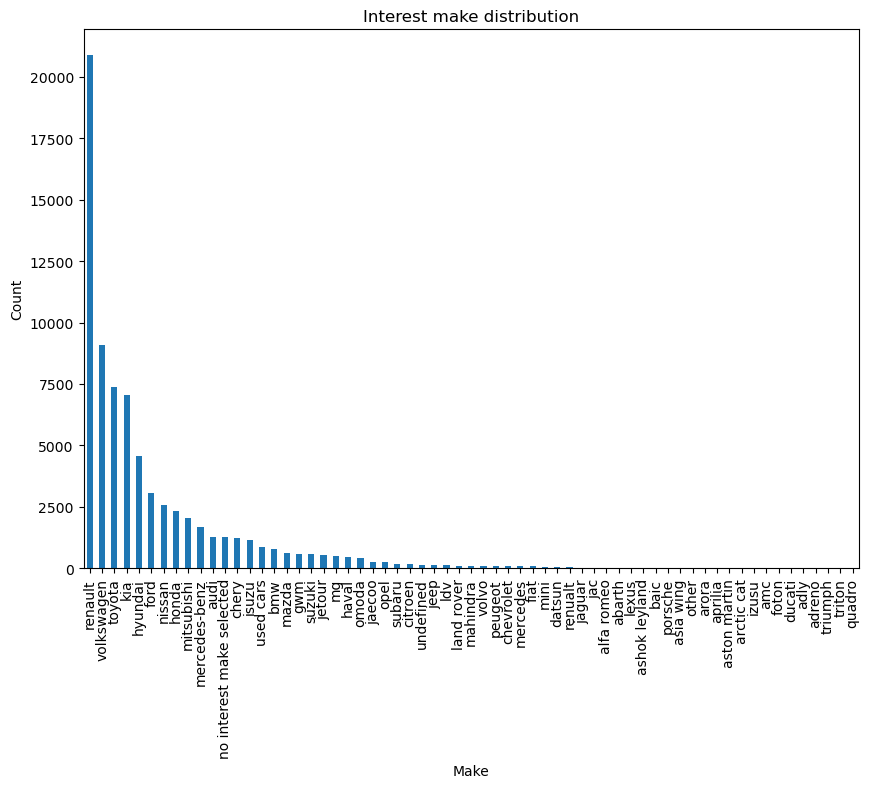

In [6]:
plt.figure(figsize=(10, 7))
train_df['clean_interestmake'].value_counts().plot(kind='bar', title='Interest make distribution', ylabel='Count', xlabel='Make')
plt.show()

In [7]:
make_popularity_breakpoint = 1500
makes = train_df['clean_interestmake'].value_counts()
popular_makes = makes[makes > make_popularity_breakpoint].index.values
popular_makes[:4]

array(['renault', 'volkswagen', 'toyota', 'kia'], dtype=object)

In [8]:
train_df['make'] = train_df['clean_interestmake'].apply(lambda make: make if make in popular_makes else "other")
test_df['make'] = test_df['clean_interestmake'].apply(lambda make: make if make in popular_makes else "other")

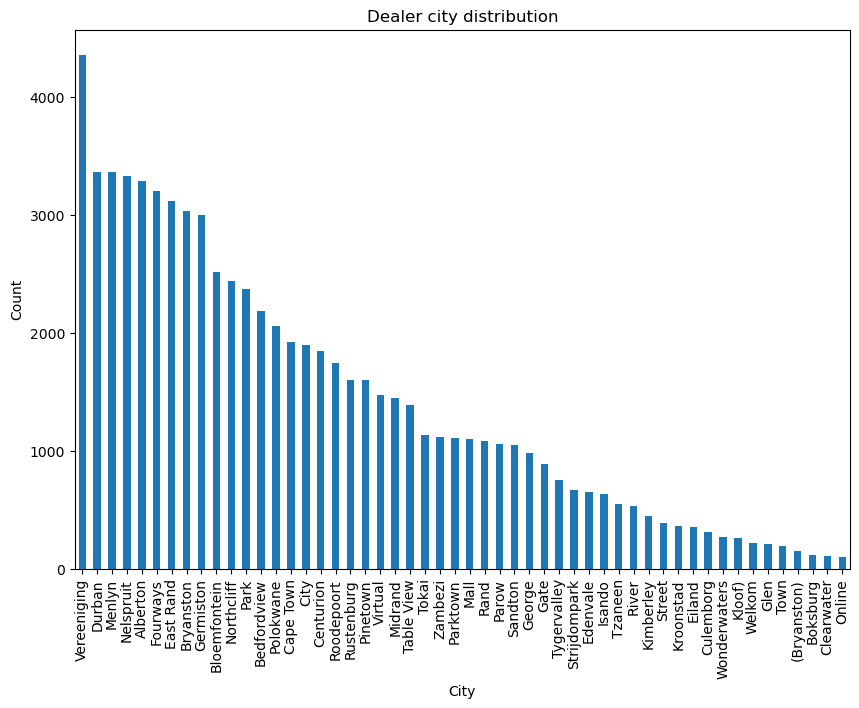

In [9]:
plt.figure(figsize=(10, 7))
train_df['dealer_city'].apply(lambda city: 'Bryanston' if city == '(Bryanston)' else city) # maybe we should move this to data cleaning notebook?
train_df['dealer_city'].value_counts().plot(kind='bar', title='Dealer city distribution', ylabel='Count', xlabel='City')
plt.show()

In [10]:
cities_breakpoint = 1000
cities = train_df['dealer_city'].value_counts()
popular_cities = cities[cities > cities_breakpoint].index.values
popular_cities[:4]

array(['Vereeniging', 'Durban', 'Menlyn', 'Nelspruit'], dtype=object)

In [11]:
train_df['city'] = train_df['dealer_city'].apply(lambda city: city if city in popular_cities else "other")
test_df['city'] = test_df['dealer_city'].apply(lambda city: city if city in popular_cities else "other")

In [12]:
train_df['city'].nunique(), test_df['city'].nunique(), test_df['make'].nunique(), train_df['make'].nunique()

(31, 31, 11, 11)

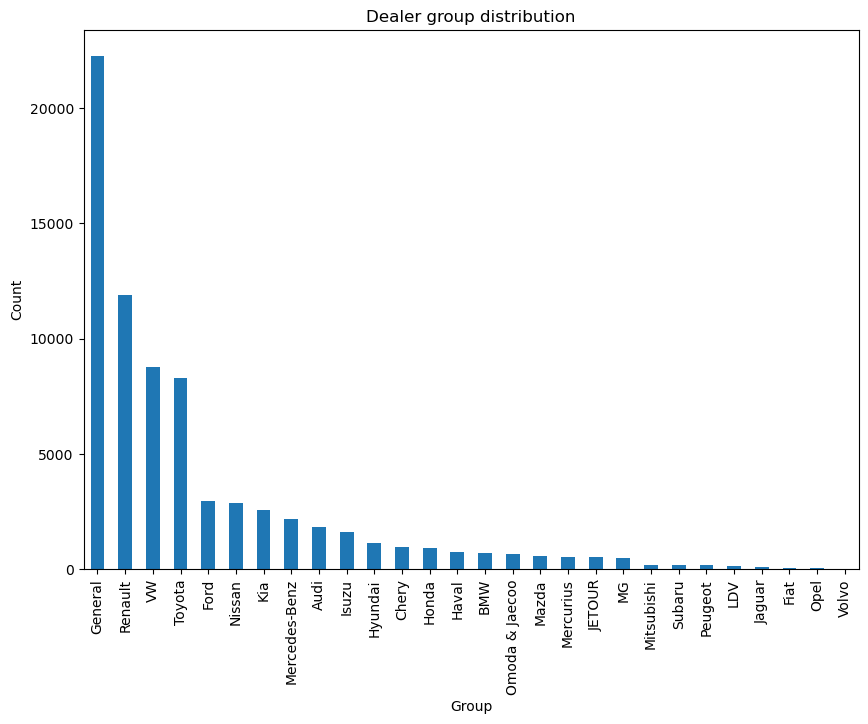

In [13]:
plt.figure(figsize=(10, 7))
train_df['dealer_group'].value_counts().plot(kind='bar', title='Dealer group distribution', ylabel='Count', xlabel='Group')
plt.show()

In [14]:
groups_breakpoint = 1000
groups = train_df['dealer_group'].value_counts()
popular_groups = groups[groups > groups_breakpoint].index.values
popular_groups[:4]

array(['General', 'Renault', 'VW', 'Toyota'], dtype=object)

In [15]:
train_df['group'] = train_df['dealer_group'].apply(lambda group: group if group in popular_groups else "other")
test_df['group'] = test_df['dealer_group'].apply(lambda group: group if group in popular_groups else "other")

In [16]:
train_df['group'].nunique(), test_df['group'].nunique()

(12, 12)

In [17]:
train_df.columns

Index(['customerid', 'leadid', 'leadtype', 'seek', 'vehiclesold',
       'is_email_provided', 'is_valid_email', 'is_personal_email',
       'is_personal_cell', 'is_valid_cell', 'time_of_day', 'month_period',
       'clean_interestmake', 'engine_size', 'transmission', 'is_promotional',
       'body_type', 'variant', 'drive_type', 'model_description_length',
       'dealer_city', 'dealer_group', 'is_motus_group', 'name_length',
       'is_valid_name', 'is_full_name', 'is_weekend_lead',
       'lead_response_time', 'customer_leads_count', 'make', 'city', 'group'],
      dtype='object')

In [18]:
numeric_features = ['lead_response_time', 'name_length', 'model_description_length']
categorical_features = ['leadtype', 'seek', 'engine_size', 'transmission', 'body_type', 'variant', 'drive_type','make', 'city', 'group']
ordinal_features = ['time_of_day', 'month_period',]
passthrough_features = ['customer_leads_count', 'is_weekend_lead', 'is_full_name', 'is_valid_name', 
                        'is_promotional', 'is_valid_cell', 'is_personal_cell', 'is_personal_email', 'is_valid_email', 'is_email_provided']

train_df = train_df.set_index('leadid')
test_df = test_df.set_index('leadid')

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ('numeric', StandardScaler(), numeric_features),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('passthrough', 'passthrough', passthrough_features),
    ('ordinal', OrdinalEncoder(), ordinal_features)
])

In [20]:
# df = pd.read_csv("https://www.mxhackathon.co.za/docs/TrainData.csv")
# df.isna().sum()

In [21]:
train_df.isna().sum()

customerid                  0
leadtype                    0
seek                        0
vehiclesold                 0
is_email_provided           0
is_valid_email              0
is_personal_email           0
is_personal_cell            0
is_valid_cell               0
time_of_day                 0
month_period                0
clean_interestmake          0
engine_size                 0
transmission                0
is_promotional              0
body_type                   0
variant                     0
drive_type                  0
model_description_length    0
dealer_city                 0
dealer_group                0
is_motus_group              0
name_length                 0
is_valid_name               0
is_full_name                0
is_weekend_lead             0
lead_response_time          0
customer_leads_count        0
make                        0
city                        0
group                       0
dtype: int64

In [22]:
preprocessor.fit_transform(train_df).toarray()

array([[ 2.17743921,  0.86028408,  1.66154938, ...,  1.        ,
         0.        ,  1.        ],
       [-0.35943134, -0.49532741, -0.68259216, ...,  1.        ,
         0.        ,  1.        ],
       [ 2.00831451, -0.49532741, -0.68259216, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.35943134,  1.19918696, -0.68259216, ...,  1.        ,
         2.        ,  2.        ],
       [ 0.42981727, -0.32587597, -0.68259216, ...,  1.        ,
         2.        ,  2.        ],
       [ 0.42981727,  0.18247834, -0.68259216, ...,  1.        ,
         2.        ,  2.        ]])

In [ ]:
rfc_01 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', criterion='log_loss'))
])

X = train_df[numeric_features + categorical_features + passthrough_features + ordinal_features]
y = train_df['vehiclesold']  

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [24]:
# from sklearn_pandas import DataFrameMapper

# mapper = DataFrameMapper([
#     (numeric_features, StandardScaler()),
#     (categorical_features, OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
#     (passthrough_features, None),
#     (ordinal_features, OrdinalEncoder())
# ], df_out=True)

# X_mapped = mapper.fit_transform(train_df)

In [25]:
rfc_01.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['lead_response_time',
                                                   'name_length',
                                                   'model_description_length']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['leadtype', 'seek',
                                                   'engine_size',
                                                   'transmission', 'body_type',
                                                   'variant', 'drive_type',
                                                   'make', 'city', 'group']),
                                                 ('passthrough', 'passthrough',
                                                  ['customer_leads_count',
                                                   'is_weekend_lead',
                                                   'is_full_name',
                                                   'is_valid_name',
                                                   'is_promotional',
                                                   'is_valid_cell',
                                                   'is_personal_cell',
                                                   'is_personal_email',
                                                   'is_valid_email',
                                                   'is_email_provided']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['time_of_day',
                                                   'month_period'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='log_loss'))])

In [26]:
y_pred = rfc_01.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17515
           1       0.05      0.01      0.02       807

    accuracy                           0.95     18322
   macro avg       0.50      0.50      0.50     18322
weighted avg       0.92      0.95      0.93     18322



In [79]:
def report_metrics(model, X_test=X_test, y_test=y_test):
    y_pred = model.predict(X_test)
    print("PR-AUC:", average_precision_score(y_true=y_test, y_score=y_pred))
    print("Log loss:", log_loss(y_pred=y_pred, y_true=y_test))

In [28]:
report_metrics(model=rfc_01)

PR-AUC: 0.04413775380988681
Log loss: 1.890511456551773


## XGBoostClassifier

In [29]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [30]:
xgb_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(random_state=42))
])

In [34]:
preprocessor.transform(X_train).toarray()

array([[-0.35081879,  0.17980284, -0.21257108, ...,  1.        ,
         4.        ,  0.        ],
       [-0.35081879,  2.03478744,  0.72362739, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.36354173, -0.66337198,  0.72362739, ...,  1.        ,
         2.        ,  2.        ],
       ...,
       [-0.35081879, -1.33791183,  0.72362739, ...,  1.        ,
         2.        ,  0.        ],
       [-0.35081879, -0.15746709, -0.21257108, ...,  1.        ,
         0.        ,  1.        ],
       [-0.35081879,  0.34843781, -0.21257108, ...,  1.        ,
         3.        ,  2.        ]])

In [38]:
report_metrics(model=xgb_pipe)

PR-AUC: 0.044045409889750024
Log loss: 1.5954264217101852


In [36]:
X_train.head()

,lead_response_time,name_length,model_description_length,leadtype,seek,engine_size,transmission,body_type,variant,drive_type,...,is_full_name,is_valid_name,is_promotional,is_valid_cell,is_personal_cell,is_personal_email,is_valid_email,is_email_provided,time_of_day,month_period
leadid,,,,,,,,,,,,,,,,,,,,,
11111779,0,16,2,Facebook,Used,Unspeficied,Unspecified,Unspeficied,Unspeficied,Unspeficied,...,1,1,0,1,1,1,1,1,night,Beginning of Month
10958923,0,27,4,Facebook,Used,Unspeficied,Unspecified,Unspeficied,Unspeficied,Unspeficied,...,1,0,0,1,1,0,0,0,afternoon,Mid Month
10989978,13,11,4,CPC,Used,1.5,Unspecified,Unspeficied,Unspeficied,Unspeficied,...,1,1,0,1,1,1,1,1,evening,Month End
11368971,0,16,1,Facebook,New,Unspeficied,Unspecified,Unspeficied,Unspeficied,Unspeficied,...,1,1,0,1,1,1,1,1,morning,Beginning of Month
11006895,1,8,1,Cars.co.za,Used,Unspeficied,Unspecified,Unspeficied,Unspeficied,Unspeficied,...,0,1,0,1,1,1,1,1,dawn,Month End


In [37]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['lead_response_time',
                                                   'name_length',
                                                   'model_description_length']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['leadtype', 'seek',
                                                   'engine_size',
                                                   'transmission', 'body_type',
                                                   'variant', 'drive_type',
                                                   'make', 'city', 'group']),
                                                 ('passthrough', 'passthrough',
                                                  ['cus...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [39]:
xgb_pipe2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(random_state=42))
])

In [55]:
search_space = {
    'clf__max_depth': Integer(5, 10),
    'clf__learning_rate': Real(.001, 1., prior='log-uniform'),
    'clf__subsample': Real(.5,1.),
    'clf__colsample_bytree': Real(.5, 1.),
    'clf__colsample_bylevel': Real(.5, 1.),
    'clf__colsample_bynode': Real(.5, 1.),
    'clf__reg_alpha': Real(0., 10.),
    'clf__reg_lambda': Real(0., 10.),
    'clf__gamma': Real(0., 10.)
}

opt = BayesSearchCV(xgb_pipe2, search_spaces=search_space, cv=10, n_iter=50, scoring='roc_auc', random_state=42)

In [56]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(transformers=[('numeric',
                                                                          StandardScaler(),
                                                                          ['lead_response_time',
                                                                           'name_length',
                                                                           'model_description_length']),
                                                                         ('categorical',
                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                          ['leadtype',
                                                                           'seek',
                                                                           'engine_size',
                                                                           'transmission',
                                                                           'body_type',
                                                                           'variant',
                                                                           'drive_type',
                                                                           'make',
                                                                           'city',
                                                                           'group']),
                                                                         ('pa...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=5, high=10, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

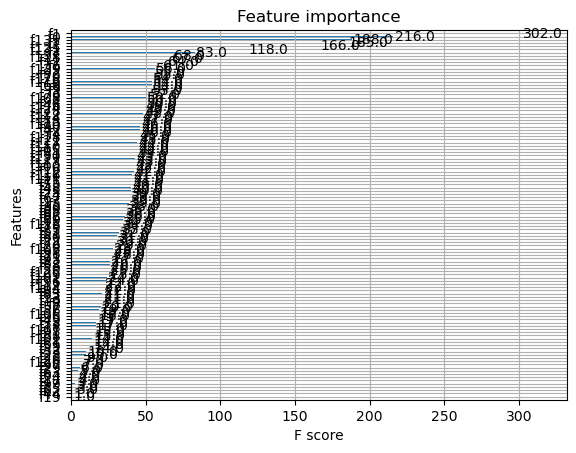

In [58]:
from xgboost import plot_importance
xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

In [59]:
opt.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['lead_response_time',
                                                   'name_length',
                                                   'model_description_length']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['leadtype', 'seek',
                                                   'engine_size',
                                                   'transmission', 'body_type',
                                                   'variant', 'drive_type',
                                                   'make', 'city', 'group']),
                                                 ('passthrough', 'passthrough',
                                                  ['cus...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.10556811766792434, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=10,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [60]:
opt.best_score_

0.6699703595618371

In [61]:
opt.score(X_test, y_test)

0.6897185665959537

In [62]:
report_metrics(model=opt.best_estimator_)

PR-AUC: 0.044045409889750024
Log loss: 1.587557487447743


----

In [65]:
y_train.sum() / len(y_train)

0.04404701259005895

In [71]:
from imblearn.ensemble import BalancedRandomForestClassifier
b_rfc_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', BalancedRandomForestClassifier(random_state=42,class_weight='balanced'))
])

In [72]:
search_space = {
    'clf__n_estimators': Integer(80, 200),
    'clf__max_depth': Integer(5, 20),
}

b_rfc = BayesSearchCV(b_rfc_pipe, search_spaces=search_space, cv=10, n_iter=50, scoring='roc_auc', random_state=42)

In [74]:
# b_rfc.fit(X_train, y_train)

In [69]:
report_metrics(b_rfc)

PR-AUC: 0.059705925109183024
Log loss: 15.495898796314583


In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.transform(X_train), y_train)

c:\Users\LENOVO\miniconda3\envs\motus-hackathon\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [77]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [80]:
report_metrics(model=xgb_clf, X_test=preprocessor.transform(X_test))

PR-AUC: 0.044045409889750024
Log loss: 1.587557487447743


In [82]:
y_train_resampled.sum() / len(y_train_resampled)

0.5

In [83]:
y_train.sum() / len(y_train)

0.04404701259005895

In [84]:
svc_clf = SVC()
svc_clf.fit(X_train_resampled, y_train_resampled)

SVC()

In [85]:
report_metrics(model=svc_clf, X_test=preprocessor.transform(X_test))

PR-AUC: 0.05639860148973323
Log loss: 7.306305462677716


In [88]:
lr_clf = LogisticRegression(max_iter=550)
lr_clf.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=550)

In [89]:
report_metrics(model=lr_clf, X_test=preprocessor.transform(X_test))

PR-AUC: 0.059840069250739286
Log loss: 14.884089157409688


In [90]:
lr_clf2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf',LogisticRegression(class_weight='balanced', max_iter=550))
])

In [91]:
lr_clf2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['lead_response_time',
                                                   'name_length',
                                                   'model_description_length']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['leadtype', 'seek',
                                                   'engine_size',
                                                   'transmission', 'body_type',
                                                   'variant', 'drive_type',
                                                   'make', 'city', 'group']),
                                                 ('passthrough', 'passthrough',
                                                  ['customer_leads_count',
                                                   'is_weekend_lead',
                                                   'is_full_name',
                                                   'is_valid_name',
                                                   'is_promotional',
                                                   'is_valid_cell',
                                                   'is_personal_cell',
                                                   'is_personal_email',
                                                   'is_valid_email',
                                                   'is_email_provided']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['time_of_day',
                                                   'month_period'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=550))])

In [92]:
report_metrics(model=lr_clf2)

PR-AUC: 0.05897147367843279
Log loss: 14.762120676341835


In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
nn = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf',KNeighborsClassifier())
])

In [95]:
nn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['lead_response_time',
                                                   'name_length',
                                                   'model_description_length']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['leadtype', 'seek',
                                                   'engine_size',
                                                   'transmission', 'body_type',
                                                   'variant', 'drive_type',
                                                   'make', 'city', 'group']),
                                                 ('passthrough', 'passthrough',
                                                  ['customer_leads_count',
                                                   'is_weekend_lead',
                                                   'is_full_name',
                                                   'is_valid_name',
                                                   'is_promotional',
                                                   'is_valid_cell',
                                                   'is_personal_cell',
                                                   'is_personal_email',
                                                   'is_valid_email',
                                                   'is_email_provided']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['time_of_day',
                                                   'month_period'])])),
                ('clf', KNeighborsClassifier())])

In [96]:
report_metrics(model=nn)

PR-AUC: 0.04451076614547745
Log loss: 1.6288693923255653


In [97]:
from sklearn.svm import LinearSVC

l_svc = LinearSVC()
l_svc.fit(X_train_resampled, y_train_resampled)

LinearSVC()

In [98]:
report_metrics(model=l_svc, X_test=preprocessor.transform(X_test))

PR-AUC: 0.06028369070424872
Log loss: 14.978516368558997


In [100]:
xgb_clf3 = XGBClassifier(scale_pos_weight=24)
xgb_clf3.fit(preprocessor.transform(X_train), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
report_metrics(xgb_clf3, X_test=preprocessor.transform(X_test))

PR-AUC: 0.0570730076874183
Log loss: 11.687334613292489


In [ ]:
s

param_grid = {
    'clf__n_estimators': [50, 100, 200, 250],
    'clf__criterion': ['log_loss',]
}


rfc_02 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=8080))
])

rfc_grid = GridSearchCV(
    rfc_02,
    param_grid=param_grid,
    scoring='average_precision',
    cv=5,
    verbose=2,
    n_jobs=-1
)

NameError: name 's' is not defined

In [ ]:
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
def report_metrics(model, y_test=y_test):
    y_pred = model.predict(X_test)
    print("PR-AUC:", average_precision_score(y_true=y_test, y_score=y_pred))
    print("Log loss:", log_loss(y_pred=y_pred, y_true=y_test))

In [ ]:
report_metrics(model=rfc_01)

PR-AUC: 0.04465598198029238
Log loss: 1.8177238146241816


In [ ]:
len(train_df[train_df['vehiclesold'] == 1]) / len(train_df)

0.044046611904047156

In [ ]:
report_metrics(model=lr_01)

PR-AUC: 0.056162439609572914
Log loss: 14.321460357645064
